In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [2]:
weight = 0.7
bias = 0.3

X = torch.arange(start = 0, end = 1, step = 0.02)
y = weight * X + bias

In [3]:
X, y

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
         0.9300, 0.9440, 0.9580, 0.9720, 0.9860]))

### Splitting data

In [4]:
train_split = int(0.8*len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]


### Plotting data

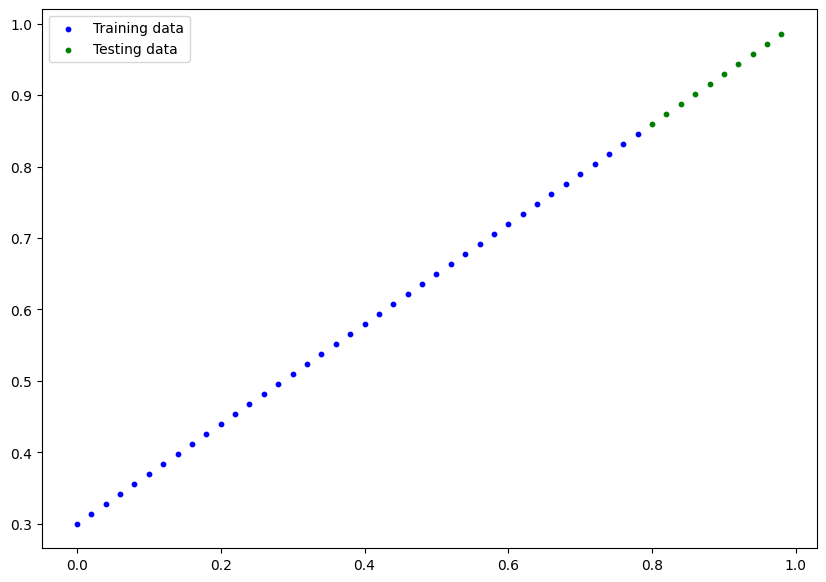

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', s=10, label="Training data")
plt.scatter(X_test, y_test, c='g', s=10, label="Testing data")
plt.legend(prop={"size":10})

### Building Model

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    
    def forward(self, x) -> torch.Tensor:
        return self.weights * x + self.bias



In [7]:
torch.manual_seed(42)

reg_model = LinearRegressionModel()

In [8]:
reg_model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Define Loss function and optimizer

In [9]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(reg_model.parameters(), lr=0.01)

### Training Loop

In [45]:
num_epoch = 200

test_loss_values = []
train_loss_values = []
for epoch in range(num_epoch):
    
    reg_model.train()
    y_pred = reg_model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    reg_model.eval()

    with torch.inference_mode():
        test_pred = reg_model(X_test)
        test_loss = loss_fn(test_pred, y_test)
        test_loss_values.append(test_loss)
        train_loss_values.append(loss.detach().numpy())
        print(f"Epoch {epoch}: Train loss {loss}, Test loss {test_loss}")



Epoch 0: Train loss 0.31288138031959534, Test loss 0.48106518387794495
Epoch 1: Train loss 0.3013603389263153, Test loss 0.4675942063331604
Epoch 2: Train loss 0.28983935713768005, Test loss 0.4541231691837311
Epoch 3: Train loss 0.2783183455467224, Test loss 0.44065219163894653
Epoch 4: Train loss 0.26679736375808716, Test loss 0.4271811842918396
Epoch 5: Train loss 0.2552763521671295, Test loss 0.41371020674705505
Epoch 6: Train loss 0.24375534057617188, Test loss 0.40023916959762573
Epoch 7: Train loss 0.23223432898521423, Test loss 0.3867681920528412
Epoch 8: Train loss 0.22071333229541779, Test loss 0.37329721450805664
Epoch 9: Train loss 0.20919232070446014, Test loss 0.3598262071609497
Epoch 10: Train loss 0.1976713240146637, Test loss 0.3463551998138428
Epoch 11: Train loss 0.18615034222602844, Test loss 0.3328842222690582
Epoch 12: Train loss 0.1746293306350708, Test loss 0.3194132149219513
Epoch 13: Train loss 0.16310831904411316, Test loss 0.30594223737716675
Epoch 14: Train

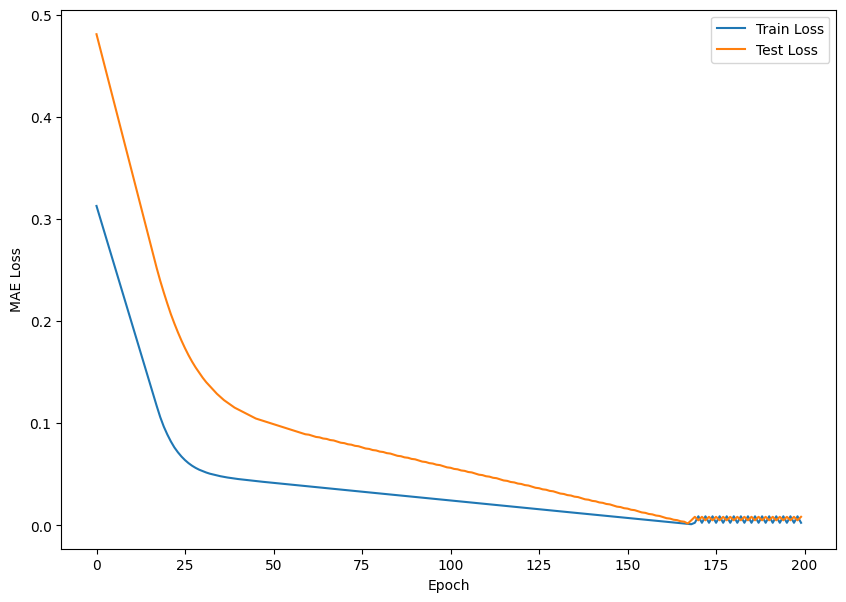

In [46]:
plt.figure(figsize=(10,7))
plt.plot(train_loss_values, label="Train Loss")
plt.plot(test_loss_values, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("MAE Loss")
plt.legend()